## MNIST Convolutional Neural Network Classifier With Keras
> Created by: Samuel Madden

> Created on: December 15, 2019
> Last Updated : March 10, 2020

## Summary <br>
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. This is a well known database and is useful for general benchmarking of classification algorithms. A Convolutional Neural Network will be implemented with the architecture as such: Architexture:   Input -> [[Conv2D->ReLU]*2 -> MaxPool2D -> Dropout] * 2 -> Flatten -> Dense -> Dropout -> Output.<br>

#### Goal: <br>
The goal of this notebook is to showcase proficiency and general knowledge of data analysis visualization tools, judgement metrics of model quality, and an understanding of which machine learning models best solve the business problem as well as conform to the format of the data.
#### Data Description<br>
The MNIST database contains 60,000 training images and 10,000 testing images each of which are grayscale 28 x 28 sized images.

#### Keras
The Keras library (containing TensorFlow backend) will be used extensively in this notebook. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error. This ease of use does not come at the cost of reduced flexibility<a href="https://keras.io/why-use-keras/">[1]</a>

## Contents
1. [Imports](#imp)<br>
    1.1 [Notebook Settup](#lib)<br>
    1.2 [Keras Library Imports](#keras)<br>
    1.3 [AWS Communication](#aws)<br>
2. [Data Preparation](#dp)<br>
    2.1 [Visualize Label Distribution](#lab)<br>
    2.2 [Scan for Null/Missing Values](#nul)<br>
    2.3 [Normalization](#norm)<br>
    2.4 [Reshape](#reshape)<br>
    2.5 [Label Encoding](#enc)<br>
    2.6 [Splitting Training and Validation Set](#split)
3. [CNN](#cnn)<br>
    3.1 [Defining the Model](#model)<br>
    3.2 [Compiling the Model](#compile)<br>
    3.3 [Fitting the Model to the Data](#fit)<br>
    3.4 [Basic Plotting and Evaluation of Model](#eval)<br>
4. [Summary and Conclusion](#sum)<br>
    4.1 [Classification Report](#report)<br>

<a id="imp"></a>
## 1. Imports

<a id="lib"></a>
### 1.1 Notebook Settup

In [1]:
# default imports
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

np.random.seed(2)

sns.set(style='white', context='notebook', palette='deep')

# Ouptut System Versions
print("Python Version: " + sys.version)
print("Pandas Version: " + pd.__version__)

Using TensorFlow backend.



Python Version: 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
Pandas Version: 0.24.2


<a id="keras"></a>
### 1.2 Keras Imports

In [ ]:
# TensorFlow base
# Keras imports
#import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

<a id="aws"></a>
### 1.3 AWS Communication

In [ ]:
# AWS IAM Role
import boto3, re
from sagemaker import get_execution_role

role = get_execution_role()

<a id="dp"></a>
## 2. Data Preparation

<a id="lab"></a>
### 2.1 Visualize Label Distribution

In [2]:
# Using .read_csv commands if dataset is local

#mnist_train = pd.read_csv('mnist/mnist_train.csv')
#mnist_test = pd.read_csv('mnist/mnist_test.csv')

# Import dataset using Keras Library
from keras.datasets.mnist import load_data

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

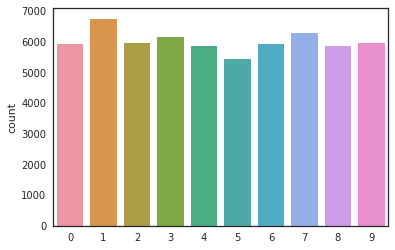

In [3]:
#X_train, Y_train = mnist_train.iloc[:,1:], mnist_train['label']
#X_test, Y_test = mnist_test.iloc[:, 1:], mnist_test['label']

(X_train, Y_train),(X_test, Y_test) = load_data()

g = sns.countplot(Y_train)

np.unique(Y_train, return_counts=True)

All labels (0-9) are accounted for in the above value count with 
no unexpected Null or -1 instances.

The labels between 0 - 9 are also relatively evenly distributed so sampling issues and natural bias in the data may be dismissed

In [4]:
# note dimension of data images
# img_rows, img_cols = 28, 28

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


<a id="null"></a>
### 2.2 Scan for Null/Missing Values

In [5]:
#np.isnan(X_train)
#np.isnan(X_test)

In [6]:
# cmds if data was in Pandas.DataFrame format
#X_test.isnull().any().describe()
#X_test.isnull().any().descrive()

<a id="norm"></a>
### 2.3 Normalization

Perform a grayscale normalization: by default the image set is grayscale

Convert the pixel lumination from a value between 0 and 255 to a decimal scale between 0 and 1

In [7]:
#X_train = X_train / 255.0
#X_test = X_test / 255.0

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

<a id="reshape"></a>
### 2.4 Reshape

The data images are 28X28 pixels. These images are reshaped to 4D representation of the MNIST dataset.

In [8]:
# Reshape image in 4 dimensions (height = 28, width = 28, chanal = 1)

# check image shape
#X_train[0].shape

img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
num_channels = 1 #images are grayscale

# reshape data to expected dimensionality of Keras
#X_trainK = X_train.values.reshape(-1, img_rows, img_cols, 1)
X_trainK = np.reshape(X_train,(X_train.shape[0],img_rows, img_cols, num_channels))
#X_testK = X_test.values.reshape(-1, img_rows, img_cols, 1)
X_testK = np.reshape(X_test,(X_test.shape[0],img_rows, img_cols, num_channels))

</br>
The above data will be fed into the Convolutional NN.
This first layer
Keras requires a 4 dimensional input to correspond to height, width and channel.</br>
In the case of MNIST, the images are grayscale and require one channel.

In [9]:
# X_train
print("X_train info: ")
print("Type: ", type(X_train))
print("Dimensions: ", X_train.ndim)
print("Type var stored: ", X_train.dtype)
print("X_trainK shape: ", X_trainK.shape)
print("X_trainK dim: ", X_trainK.ndim)
print("\n")

# X_test
print("X_test info: ")
print("Type: ", type(X_test))
print("Dimensions: ", X_test.ndim)
print("Type var stored: ", X_test.dtype)
print("X_testK shape: ", X_testK.shape)
print("X_testK shape: ", X_testK.ndim)

X_train info: 
Type:  <class 'numpy.ndarray'>
Dimensions:  3
Type var stored:  float32
X_trainK shape at [1]:  (60000, 28, 28, 1)



X_test info: 
Type:  <class 'numpy.ndarray'>
Dimensions:  3
Type var stored:  float32
X_testK shape:  (10000, 28, 28, 1)


<a id="enc"></a>
### 2.5 Label Encoding

Labels are 10 single digits 0 - 9. </br>
&#09;&nbsp;&bull; Convert each digit to a corresponding hot vector ex. 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]. This allows for identification due to the corresponding activation of one of the 10 output neurons.</br>
&nbsp;&bull; Again this transforms the data from type pandas.DataFrame to a np.ndarray.

In [10]:
num_classes = 10
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

In [11]:
# Y_train
print("Y_train info: ")
print("Type: ", type(Y_train))
print("Dimensions: ", Y_train.ndim)
print("Type var stored: ", Y_train.dtype)
print("Y_train shape: ", Y_train.shape)

Y_train info: 
Type:  <class 'numpy.ndarray'>
Dimensions:  2
Type var stored:  float32
Y_train shape:  (60000, 10)


<a id="split"></a>
### 2.6 Splitting Training and Validation Set

&bull; 10% is partitioned to the evaluation set while the remaining 90% is used to train the model. </br>
&bull; A random split of the training data is admissable as we have already established that the distribution of labels is consistent across the data set (see 2.1). This ensures no overrepresentation of certain labels in the X_train/Y_train and X_val/Y_val.</br>
&bull; This is not always the case and for unbalanced datasets use stratify = True option in train_test_split function (Only for >=0.17 sklearn versions).

In [12]:
# set random seed
random_seed = 2

In [13]:
# Split the train and validation sets for fitting the model
X_trainData, X_val, Y_trainData, Y_val = train_test_split(X_trainK, Y_train, test_size = 0.1, random_state=random_seed)

In [14]:
print("X_trainData shape: ", X_trainData.shape)
print("Y_trainData shape: ", Y_trainData.shape)
print("X_val shape: ", X_val.shape)
print("Y_val shape: ", Y_val.shape)

X_trainData shape:  (54000, 28, 28, 1)
Y_trainData shape:  (54000, 10)
X_val shape:  (6000, 28, 28, 1)
Y_val shape:  (6000, 10)


Print a sample element of the X_train dataset

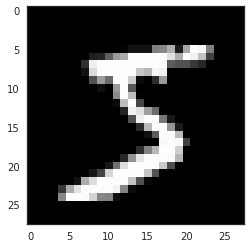

In [15]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

<a id="cnn"></a>
## 3. CNN

<a id="model"></a>
### 3.1 Defining the Model

The Keras data model type will be set to 'Sequential', in which the model is built one layer at a time.

&nbsp; &bull; add() function will add layers to the model individually<br>
&nbsp; &bull; The inputs of 32 & 64 refer to the number of nodes in specific layer


Conv2D layers are convolutional layers that deal with the 2 dimensional matrix input (a.k.a. input images).<br> 
This is a learnable filter that is a transformation on the image defined by the kernel size

&nbsp; &bull; Kernel size refers to the size of the filter matrix for the convolutional layer. Size=3 means a 3x3 conv matrix<br>
&nbsp; &bull; Activation function is set to ReLU define by y=max(0,x), which lends to model sparsity and faster convergence.<br>
&nbsp; &bull; MaxPool2D picks the max value of the neighboring pool<br>

The Flatten layer converts the final feature maps into a single 1D vector.

Dense refers to the fact that each neuron of a layer are connected to all the neurons of the layer previous.

Dropout randomly selects nodes to be ignored(set w=0), promoting distributed learning, generalization and reducing overfitting.

The output layer consists of 10 nodes, representing the classification options of 0-9<br>
&nbsp; &bull; 'softmax' has the output layer sum to 1 allowing the output nodes to be interpreted as probabilities of their corresponding number.

In [16]:
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Depreciation Warnings are important for developers
# this is a temporary meausure and will be removed in future iterations

In [17]:
# Create the CNN model

# Architexture: Input -> [[Conv2D->ReLU]*2 -> MaxPool2D -> Dropout] * 2 -> 
#  Flatten -> Dense -> Dropout -> Output

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (img_rows,img_cols,num_channels)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

<a id="compile"></a>
### 3.2 Compiling the Model

Settup Metrics, Loss Function and Optimizer algorithm

&nbsp;&bull;&nbsp;Metric: Accuracy<br>
&nbsp;&bull;&nbsp;Loss Funtion: Cross Entropy<br>
&nbsp;&bull;&nbsp;Optimization: Adam (Stochastic Optimization)

In [18]:
model.compile(metrics=["accuracy"],loss = 'categorical_crossentropy', optimizer = 'adam')

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

<a id="fit"></a>
### 3.3 Fitting the Model to the data

In [20]:
hist = model.fit(X_trainData, Y_trainData,  
          batch_size=64,
          epochs=10,
          validation_data=(X_val, Y_val))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 95s 2ms/step - loss: 0.2374 - acc: 0.9258 - val_loss: 0.0541 - val_acc: 0.9835
Epoch 2/10
54000/54000 [==============================] - 91s 2ms/step - loss: 0.0882 - acc: 0.9743 - val_loss: 0.0417 - val_acc: 0.9873
Epoch 3/10
54000/54000 [==============================] - 93s 2ms/step - loss: 0.0661 - acc: 0.9802 - val_loss: 0.0396 - val_acc: 0.9878
Epoch 4/10
54000/54000 [==============================] - 91s 2ms/step - loss: 0.0567 - acc: 0.9830 - val_loss: 0.0309 - val_acc: 0.9915
Epoch 5/10
54000/54000 [==============================] - 93s 2ms/step - loss: 0.0492 - acc: 0.9855 - val_loss: 0.0299 - val_acc: 0.9927
Epoch 6/10
54000/54000 [==============================] - 241s 4ms/step - loss: 0.0412 - acc: 0.9873 - val_loss: 0.0290 - val_acc: 0.9920
Epoch 7/10
54000/54000 [==============================] - 312s 6ms/step - loss: 0.0351 - acc: 0.9899 - val_loss: 0.0266 - val_ac

<a id="eval"></a>
### 3.4 Basic Plotting and Evalutation of Model

In [21]:
score = model.evaluate(X_testK, Y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.019033051148535377
Test accuracy:  0.9942


In [22]:
#bucket ='sagemaker-studio-thaaoml7ipn'

#data_location = 's3://{}/{}'.format(bucket, data_key_test)

#model.save('mnist_cnn.h5')

In [23]:
# Create a confusion matrix

# Below code block is from SKLearn website
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

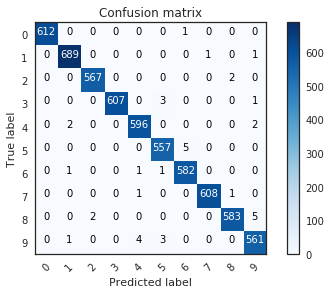

In [24]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Graph elbow curve

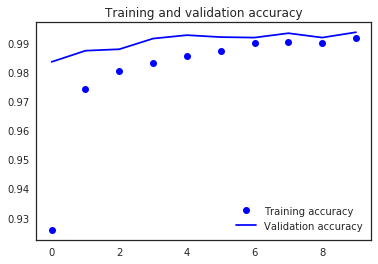

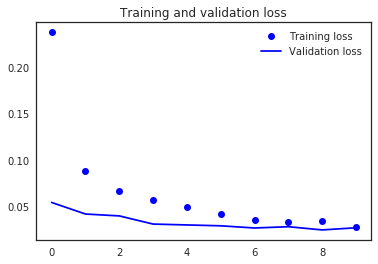

In [26]:
#print(hist.history.keys())
accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Next, identify the most common miscategorized images and visualize them. In

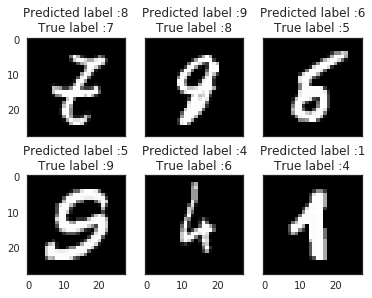

In [33]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    plt.subplots_adjust(top=1)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)), cmap="gray")
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

<a id="sum"></a>
## 4. Summary and Conclusion

<a id="report"></a>
### 4.1 Classification Report

In [34]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true_classes = np.argmax(Y_val, axis = 1)

In [35]:
Y_pred_classes[:5], Y_true_classes[:5]

(array([2, 1, 5, 0, 6]), array([2, 1, 5, 0, 6]))

In [36]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(Y_true_classes, Y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       613
     Class 1       0.99      1.00      1.00       691
     Class 2       1.00      1.00      1.00       569
     Class 3       1.00      0.99      1.00       611
     Class 4       0.99      0.99      0.99       600
     Class 5       0.99      0.99      0.99       562
     Class 6       0.99      0.99      0.99       585
     Class 7       1.00      1.00      1.00       610
     Class 8       0.99      0.99      0.99       590
     Class 9       0.98      0.99      0.99       569

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



In [38]:
predicted_classes = model.predict_classes(X_testK)
submissions=pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)),
                         "Label": predicted_classes})
submissions.to_csv("asd.csv", index=False, header=True)

In [39]:
model.save('mnist_cnn_1.h5')
json_string = model.to_json()